<a href="https://colab.research.google.com/github/Nagashree90/machine-learning/blob/main/projectlinearregresssionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
df.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'scatter plot for input feature TV and Sales')

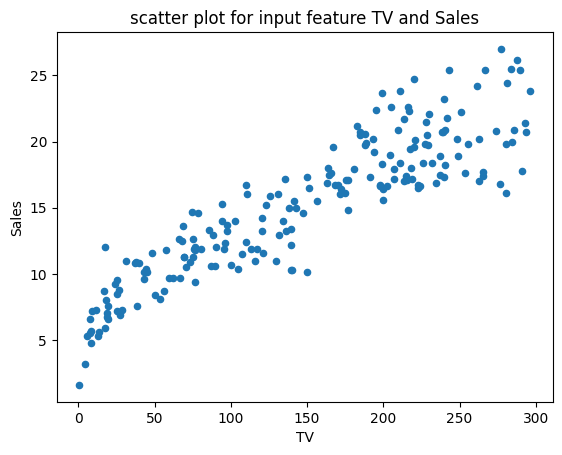

In [6]:
#create scatter plot for all input features and output features
df.plot(x='TV',y='Sales',kind='scatter')
plt.title('scatter plot for input feature TV and Sales')

Text(0.5, 1.0, 'scatter plot for input feature Radio and Sales')

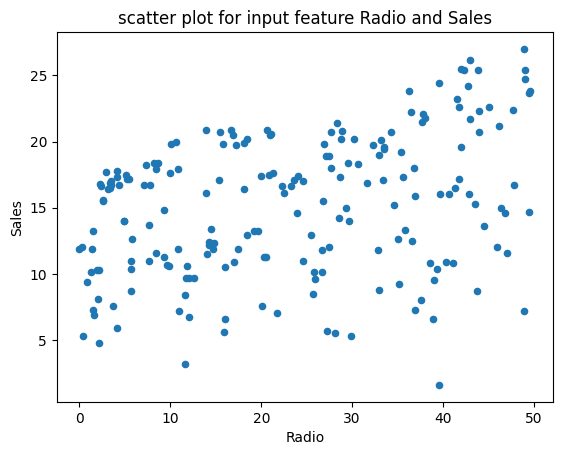

In [7]:
#create scatter plot for all input features and output features
df.plot(x='Radio',y='Sales',kind='scatter')
plt.title('scatter plot for input feature Radio and Sales')

Text(0.5, 1.0, 'scatter plot for input feature Newspaper and Sales')

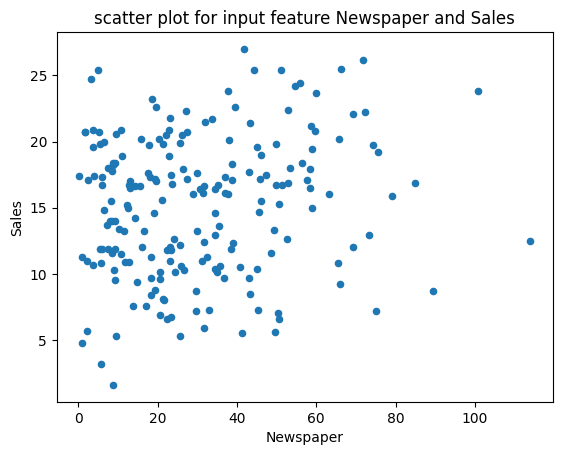

In [8]:
#create scatter plot for all input features and output features
df.plot(x='Newspaper',y='Sales',kind='scatter')
plt.title('scatter plot for input feature Newspaper and Sales')

In [9]:
#data prepare for linear regression
X = df.drop('Sales',axis=1)# input features
y = df['Sales'] # output feature


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
#train test split function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [13]:
#import linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)# fit() - to train the model, training model
print('model training completed')


model training completed


In [15]:
y_pred = lr.predict(X_test)
#print(y_pred)
print(lr.coef_,lr.intercept_)

[0.05450927 0.10094536 0.00433665] 4.714126402214127


In [17]:
#viuslaize these coefficients
coef_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
TV,0.054509
Radio,0.100945
Newspaper,0.004337


from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

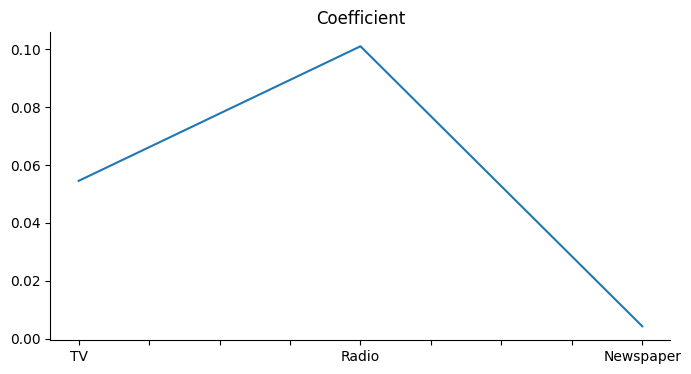

In [18]:
from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test data
y_pred = lr.predict(X_test)
#error = |y_pred - y_test|. |3-3.1| = |-0.1| = 0.1

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R2): 0.91


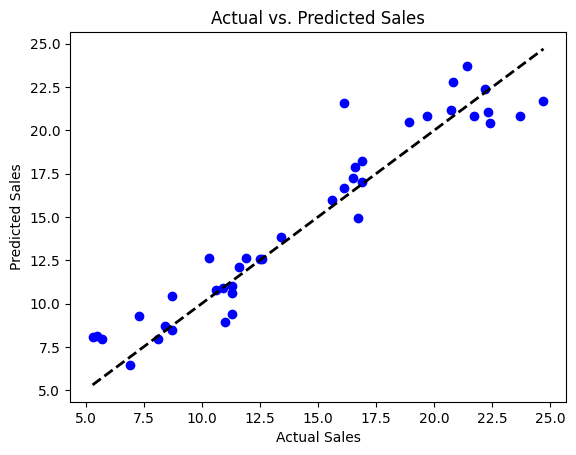

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

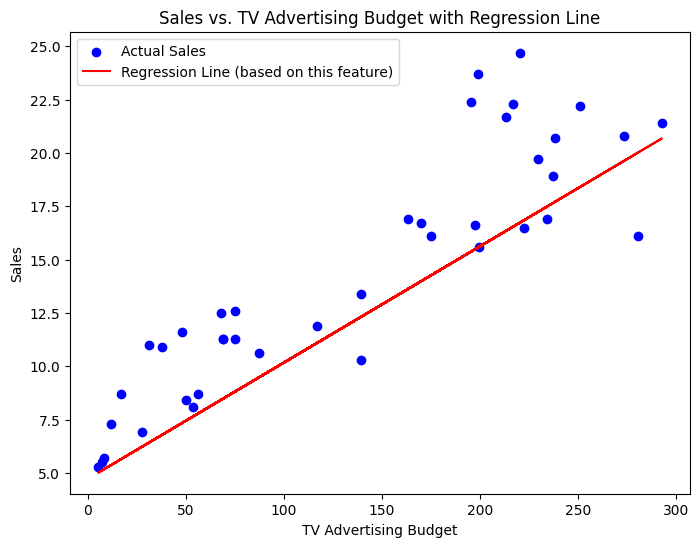

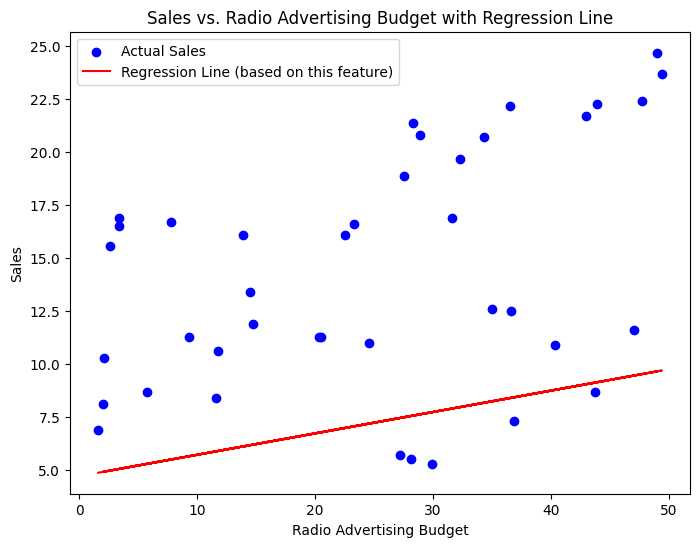

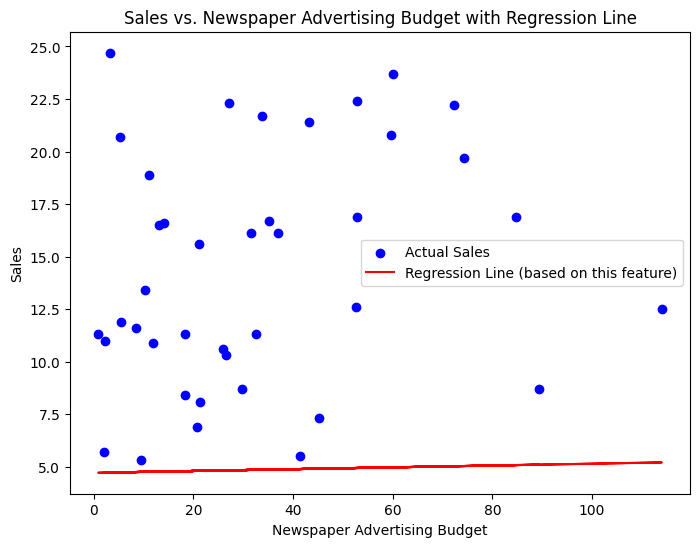

In [23]:
import matplotlib.pyplot as plt

# Get the model's coefficients and intercept
intercept = lr.intercept_
coefficients = lr.coef_

# Create plots for each feature vs. Sales
features = ['TV', 'Radio', 'Newspaper']
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Sales')

    # Calculate predicted sales based on the current feature and the model's coefficients
    # This is an approximation for visualization purposes in 2D
    # The actual prediction uses all features
    predicted_sales_line = intercept + coefficients[i] * X_test[feature]
    plt.plot(X_test[feature], predicted_sales_line, color='red', label='Regression Line (based on this feature)')

    plt.xlabel(f'{feature} Advertising Budget')
    plt.ylabel('Sales')
    plt.title(f'Sales vs. {feature} Advertising Budget with Regression Line')
    plt.legend()
    plt.show()

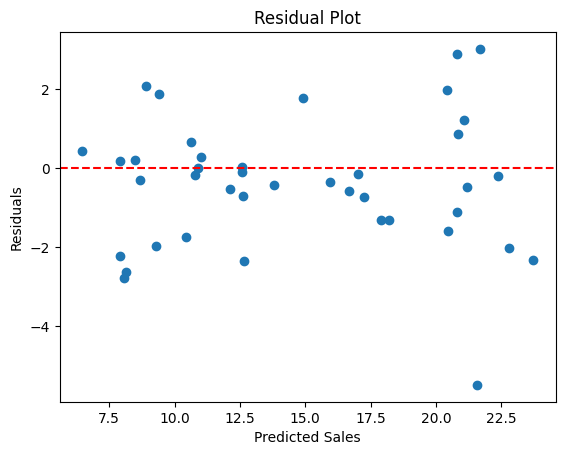

In [24]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()